<a href="https://colab.research.google.com/github/amrutdeshpande/Amrut-Deshpande/blob/master/Ad_click_Prediction_IISc_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd
df = pd.read_csv('/content/sample_data/advertising_ef.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,27-03-2016 00:53,0
1,NaN,31.0,68441.85,193.77,Monitored national standardization,West Jodi,Male,Nauru,04-04-2016 01:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,13-03-2016 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,10-01-2016 02:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,03-06-2016 03:36,0


In [3]:
# Display information about the DataFrame, including data types and non-null values.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1005 non-null   float64
 1   Age                       998 non-null    float64
 2   Area Income               998 non-null    float64
 3   Daily Internet Usage      1005 non-null   float64
 4   Ad Topic Line             1009 non-null   object 
 5   City                      998 non-null    object 
 6   Gender                    1009 non-null   object 
 7   Country                   996 non-null    object 
 8   Timestamp                 1009 non-null   object 
 9   Clicked on Ad             1009 non-null   int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 79.0+ KB


In [4]:
df.describe()


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
count,1005.000000,998.000000,998.000000,1005.000000,1009.000000
mean,65.009463,35.962926,54958.573617,180.041920,0.501487
std,15.879997,8.772142,13381.286752,43.923438,0.500246
min,32.600000,19.000000,13996.500000,104.780000,0.000000
25%,51.300000,29.000000,46993.367500,138.870000,0.000000
50%,68.370000,35.000000,56998.245000,183.420000,1.000000
75%,78.570000,42.000000,65267.402500,218.800000,1.000000
max,91.430000,61.000000,79484.800000,269.960000,1.000000


In [5]:
df['Area Income'].fillna(df['Area Income'].mean(),inplace=True)
df['Area Income'] = np.around(df['Area Income'],decimals=2)
df['Daily Internet Usage'].fillna(df['Daily Internet Usage'].mean(),inplace=True)
df['City'].value_counts().index[0]
df['City'].fillna(df['City'].value_counts().index[0],inplace=True)
df['Country'].value_counts().index[0]
df['Country'].fillna(df['Country'].value_counts().index[0],inplace=True)

<ipython-input-5-e7d51714ea31>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Area Income'].fillna(df['Area Income'].mean(),inplace=True)
<ipython-input-5-e7d51714ea31>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

In [6]:
df['Age'].fillna(df['Age'].median(),inplace=True)
df['Daily Time Spent on Site'].fillna(df['Daily Time Spent on Site'].median(),inplace=True)


<ipython-input-6-d635b13c3898>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace=True)
<ipython-input-6-d635b13c3898>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [7]:
print(df['Ad Topic Line'].value_counts())


Ad Topic Line
Proactive non-volatile encryption               2
Virtual 5thgeneration emulation                 2
Organic bottom-line service-desk                2
Networked local secured line                    2
Realigned intermediate application              2
                                               ..
De-engineered tertiary secured line             1
Reverse-engineered well-modulated capability    1
Integrated coherent pricing structure           1
Realigned next generation projection            1
Proactive bandwidth-monitored policy            1
Name: count, Length: 1000, dtype: int64


In [8]:
df.isna().sum()


,0
Daily Time Spent on Site,0
Age,0
Area Income,0
Daily Internet Usage,0
Ad Topic Line,0
City,0
Gender,0
Country,0
Timestamp,0
Clicked on Ad,0


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1009 non-null   float64
 1   Age                       1009 non-null   float64
 2   Area Income               1009 non-null   float64
 3   Daily Internet Usage      1009 non-null   float64
 4   Ad Topic Line             1009 non-null   object 
 5   City                      1009 non-null   object 
 6   Gender                    1009 non-null   object 
 7   Country                   1009 non-null   object 
 8   Timestamp                 1009 non-null   object 
 9   Clicked on Ad             1009 non-null   int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 79.0+ KB


In [10]:
object_Dtype = ['Ad Topic Line', 'City', 'Country']
df[object_Dtype].describe(include=['O'])

,Ad Topic Line,City,Country
count,1009,1009,1009
unique,1000,961,237
top,Proactive non-volatile encryption,Williamsport,Czech Republic
freq,2,14,22


In [11]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [19]:
##splitting data for ad click

from sklearn.model_selection import train_test_split
y_ad = df['Clicked on Ad']
y_gen = df['Gender']
X = df.iloc[:,[0,1,2,3]]

X_train_ad, X_test_ad, y_train_ad, y_test_ad = train_test_split(X, y_ad, test_size=0.2, random_state=42)

In [18]:
X,y_ad


(      Daily Time Spent on Site   Age  Area Income  Daily Internet Usage
 0                        68.95  35.0     61833.90                256.09
 1                        68.37  31.0     68441.85                193.77
 2                        69.47  26.0     59785.94                236.50
 3                        74.15  29.0     54806.18                245.89
 4                        68.37  35.0     73889.99                225.58
 ...                        ...   ...          ...                   ...
 1004                     72.97  30.0     71384.57                208.58
 1005                     51.30  45.0     67782.17                134.42
 1006                     51.63  51.0     42415.72                120.37
 1007                     55.55  19.0     41920.79                187.95
 1008                     45.01  26.0     29875.80                178.35
 
 [1009 rows x 4 columns],
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 1004    1
 1005    1
 1006   

In [20]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

model_ad = XGBClassifier()

model_ad.fit(X_train_ad, y_train_ad)

XGB_model_ad_click = model_ad.predict(X_test_ad)

print('\nXGBClassifier accuracy:', accuracy_score(XGB_model_ad_click, y_test_ad))
cf_matrix_ad = confusion_matrix(XGB_model_ad_click, y_test_ad)
print('\nConfusion Matrix:')
print(cf_matrix_ad)


XGBClassifier accuracy: 0.9653465346534653

Confusion Matrix:
[[ 93   4]
 [  3 102]]


In [25]:
# prompt: hyper parameter tuning on the above model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
%matplotlib inline

# ... (Your existing code for data loading and preprocessing) ...

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize the XGBoost classifier
model_ad = XGBClassifier(objective='binary:logistic', eval_metric='logloss')

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model_ad, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1, verbose=2)


# Fit the grid search to the data
grid_search.fit(X_train_ad, y_train_ad)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best score: {best_score}")

# Train the model with the best parameters
hyper_tune_model_ad = XGBClassifier(**best_params)
hyper_tune_model_ad.fit(X_train_ad, y_train_ad)

# Make predictions using the best model
XGB_model_ad_click_hyper_tune = hyper_tune_model_ad.predict(X_test_ad)

# Evaluate the best model
print('\nXGBClassifier accuracy:', accuracy_score(y_test_ad, XGB_model_ad_click_hyper_tune)) #Fixed: y_test_ad first
cf_matrix_ad = confusion_matrix(y_test_ad,XGB_model_ad_click_hyper_tune) #Fixed: y_test_ad first
print('\nConfusion Matrix:')
cf_matrix_ad

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500, 'subsample': 0.8}
Best score: 0.9640644361833953

XGBClassifier accuracy: 0.9603960396039604

Confusion Matrix:


array([[ 92,   4],
       [  4, 102]])

In [52]:
print(classification_report(y_test_ad, XGB_model_ad_click))
print(confusion_matrix(y_test_ad, XGB_model_ad_click))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        96
           1       0.96      0.96      0.96       106

    accuracy                           0.96       202
   macro avg       0.96      0.96      0.96       202
weighted avg       0.96      0.96      0.96       202

[[ 92   4]
 [  4 102]]


In [39]:
# Plot confusion matrix
!pip install seaborn
import seaborn as sns # Import seaborn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_test, y_pred, model_name,target_name, title="Confusion Matrix"):
    """
    Plot and saves the confusion matrix using seaborn.
    """
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.savefig(model_name+target_name+'_CM'+'.jpg', dpi = 300)
    plt.show()

In [41]:
# Plot ROC curve
!pip install scikit-learn
from sklearn.metrics import roc_curve, roc_auc_score # Import roc_curve and roc_auc_score
import matplotlib.pyplot as plt

def plot_roc_curve(y_test, y_proba, model_name, target_name, title="ROC Curve"):
    """
    Plot and saves the ROC curve using matplotlib.
    """
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_proba))
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.title(title)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.savefig(model_name + target_name + '_Roc' + '.jpg', dpi=300)
    plt.show()

In [29]:
# Build a pipeline for selected classification model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

def build_pipeline(model_name):
    """
    Build and return a pipeline with preprocessing and the chosen classification model.
    """
    model_dict = {
        'naive_bayes': GaussianNB(),
        'svm': SVC(probability=True, class_weight='balanced'),  # SVM needs `probability=True` for ROC curve
        'decision_tree': DecisionTreeClassifier(random_state=42)  # Added Decision Tree
    }

    if model_name not in model_dict:
        raise ValueError("Invalid model name. Choose from 'naive_bayes', 'svm', 'decision_tree'.")

    return Pipeline([
        ('scaler', StandardScaler()),  # Preprocessing step
        ('classifier', model_dict[model_name])  # Chosen model
    ])


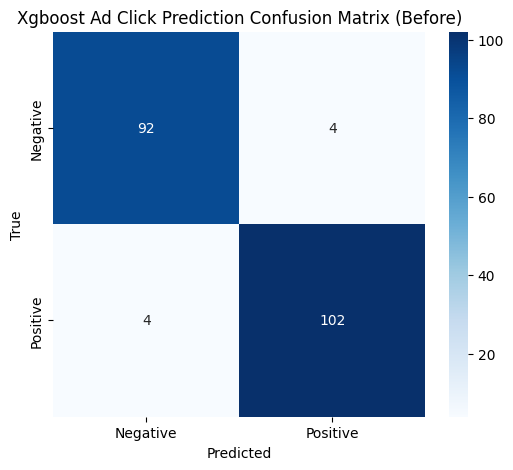

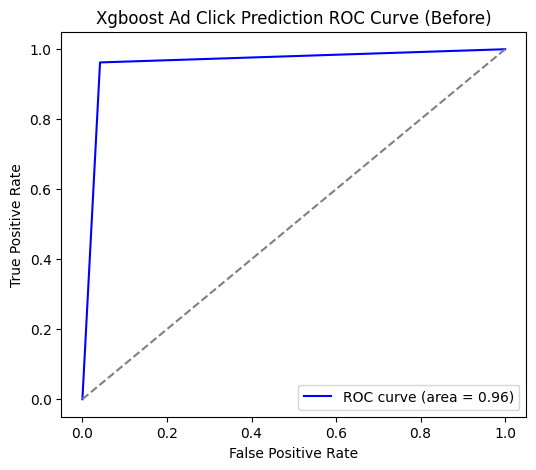

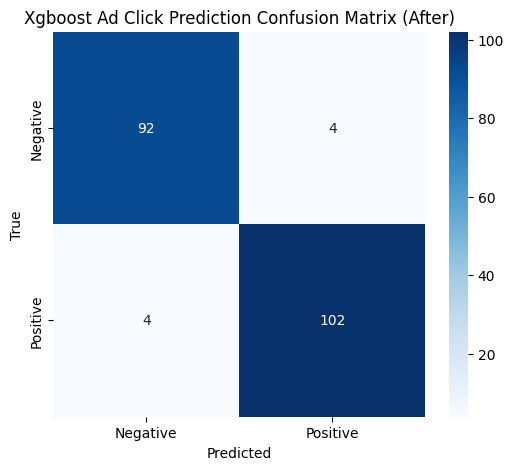

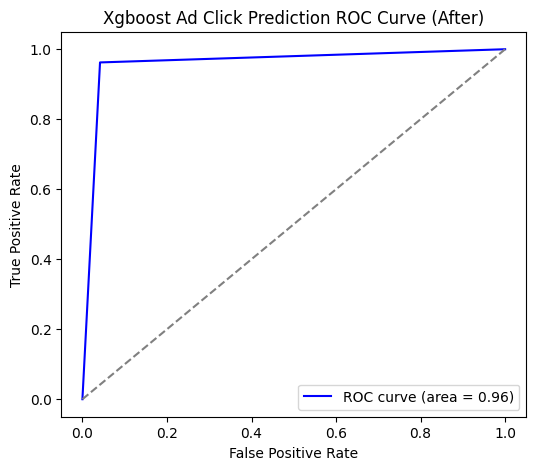

In [42]:
# Step 11: Plot confusion matrix and ROC curve for ad click before and after hyper-parameter-tuning
model_name = 'XGBoost'  # Define the model name
target_name = 'Ad_Click' # Define the target name

#Before
plot_confusion_matrix(y_test_ad, XGB_model_ad_click, model_name, target_name+'_Before', f"{model_name.capitalize()} Ad Click Prediction Confusion Matrix (Before)") # Pass the entire XGB_model_ad_click array
plot_roc_curve(y_test_ad, XGB_model_ad_click, model_name, target_name+'_Before', f"{model_name.capitalize()} Ad Click Prediction ROC Curve (Before)") # Pass the entire XGB_model_ad_click array

#After
plot_confusion_matrix(y_test_ad, XGB_model_ad_click_hyper_tune, model_name, target_name+'_After', f"{model_name.capitalize()} Ad Click Prediction Confusion Matrix (After)") # Pass the entire XGB_model_ad_click_hyper_tune array
plot_roc_curve(y_test_ad, XGB_model_ad_click_hyper_tune, model_name, target_name+'_After', f"{model_name.capitalize()} Ad Click Prediction ROC Curve (After)") # Pass the entire XGB_model_ad_click_hyper_tune array

In [53]:
#Compare metrics before and after hyperparameter tuning
def compare_metrics(before_metrics, after_metrics, model_name, traget_name):
    """
    Compare metrics before and after hyperparameter tuning.
    """
    print(f"\nMetrics Comparison for {model_name} (Before and After Hyperparameter Tuning):")
    print(f"{'Metric':<20}{'Before Tuning':<15}{'After Tuning':<15}")
    for metric, before, after in zip(["Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC"],before_metrics, after_metrics):
          print(f"{metric:<20}{before:<15.4f}{after:<15.4f}")
    # Plot comparison of metrics
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC']
    before_values = before_metrics
    after_values = after_metrics

    plt.figure(figsize=(8, 6))
    x = range(len(metrics))
    plt.bar(x, before_values, width=0.4, label='Before Tuning', align='center')
    plt.bar(x, after_values, width=0.4, label='After Tuning', align='edge')
    plt.xticks(x, metrics)
    plt.title(f'Metrics Comparison for {model_name}')
    plt.ylabel('Scores')
    plt.legend()
    plt.savefig(model_name+target_name+'bar_plot'+'.jpg', dpi = 300)
    plt.show()

In [54]:
#Save metrics to a file with the model name in the filename

def save_metrics_to_file(before_metrics, after_metrics, model_name, target_name, directory='./'):
    """
    Save metrics comparison before and after tuning to a file with the model name in the filename.
    """
    # Construct the filename dynamically based on model name and target
    filename = f"{model_name}_{target_name}_metrics_comparison.txt"

    # Metrics to be saved
    metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC"]

    # Open the file and write the metrics
    with open(filename, 'w') as file:  # 'w' mode to overwrite for a new file
        file.write(f"Metrics Comparison for {model_name.capitalize()} - {target_name}\n")
        file.write(f"{'Metric':<20}{'Before Tuning':<20}{'After Tuning':<20}\n")
        for metric, before, after in zip(metrics, before_metrics, after_metrics):
            file.write(f"{metric:<20}{before:<20.4f}{after:<20.4f}\n")
        file.write("\n")

    print(f"Metrics saved to {filename}")


Metrics Comparison for XGBoost (Before and After Hyperparameter Tuning):
Metric              Before Tuning  After Tuning   
Accuracy            0.9604         0.9604         
Precision           0.9623         0.9623         
Recall              0.9623         0.9623         
F1 Score            0.9623         0.9623         
ROC-AUC             0.9603         0.9603         


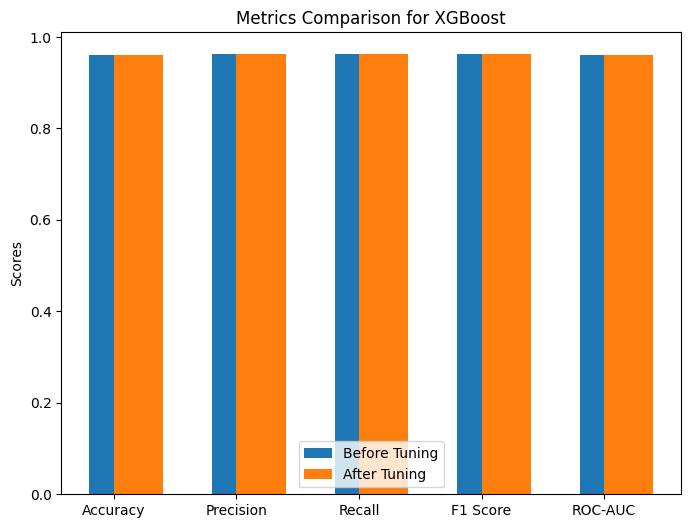

Metrics saved to XGBoost_Ad_click_metrics_comparison.txt


In [58]:
#Compare metrics before and after hyperparameter tuning for ad click prediction
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming you have functions to calculate these metrics (e.g., calculate_accuracy, calculate_precision, etc.)
# Calculate metrics before tuning
accuracy_before = accuracy_score(y_test_ad, XGB_model_ad_click)
precision_before = precision_score(y_test_ad, XGB_model_ad_click)
recall_before = recall_score(y_test_ad, XGB_model_ad_click)
f1_before = f1_score(y_test_ad, XGB_model_ad_click)
roc_auc_before = roc_auc_score(y_test_ad, XGB_model_ad_click)

# Calculate metrics after tuning
accuracy_after = accuracy_score(y_test_ad, XGB_model_ad_click_hyper_tune)
precision_after = precision_score(y_test_ad, XGB_model_ad_click_hyper_tune)
recall_after = recall_score(y_test_ad, XGB_model_ad_click_hyper_tune)
f1_after = f1_score(y_test_ad, XGB_model_ad_click_hyper_tune)
roc_auc_after = roc_auc_score(y_test_ad, XGB_model_ad_click_hyper_tune)

# Create lists of metrics
before_metrics = [accuracy_before, precision_before, recall_before, f1_before, roc_auc_before]
after_metrics = [accuracy_after, precision_after, recall_after, f1_after, roc_auc_after]

compare_metrics(before_metrics, after_metrics, model_name, target_name)  # Assuming compare_metrics is already defined
# After comparing metrics for ad click prediction
save_metrics_to_file(before_metrics, after_metrics, model_name, 'Ad_click')  # Assuming save_metrics_to_file is already defined

In [59]:
# Save model using pickle
def save_model(pipeline, model_name, target_name, directory='./'):
    """
    Save the trained pipeline to a file using pickle.

    Args:
        pipeline (Pipeline): The trained pipeline object.
        model_name (str): The name of the model (e.g., 'svm', 'naive_bayes').
        target_name (str): The target variable name (e.g., 'Gender', 'Ad_click').
        directory (str): Directory where the model file should be saved. Defaults to the current directory.

    Returns:
        str: The path to the saved model file.
    """
    # Ensure the directory exists
    os.makedirs(directory, exist_ok=True)

    # Construct the filename
    filename = os.path.join(directory, f"{model_name}_{target_name}_model.pkl")

    # Save the pipeline using pickle
    try:
        with open(filename, 'wb') as f:
            pickle.dump(pipeline, f)
        print(f"Model saved successfully to: {filename}")
    except Exception as e:
        print(f"Error saving model: {e}")
        return None

    return filename

In [61]:
#Save the model after training
save_model(XGB_model_ad_click_hyper_tune, model_name, target_name, directory='./models/')

Model saved successfully to: ./models/XGBoost_Ad_click_model.pkl


'./models/XGBoost_Ad_click_model.pkl'

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}

XGBClassifier accuracy: 0.9554455445544554

Confusion Matrix:
[[98  4]
 [ 5 95]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       103
           1       0.95      0.96      0.95        99

    accuracy                           0.96       202
   macro avg       0.96      0.96      0.96       202
weighted avg       0.96      0.96      0.96       202

[[98  5]
 [ 4 95]]


In [ ]:
print('Number of examples and features:', df.shape)
print('features in the dataset:', df.columns.tolist())

Number of examples and features: (1009, 10)
features in the dataset: ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Ad Topic Line', 'City', 'Gender', 'Country', 'Timestamp', 'Clicked on Ad']


In [ ]:
object_features = ['Ad Topic Line', 'City', 'Country', 'Timestamp']
df[object_features].describe(include=['O'])

# New section

In [ ]:
print(df.isnull().sum())

Daily Time Spent on Site     4
Age                         11
Area Income                 11
Daily Internet Usage         4
Ad Topic Line                0
City                        11
Gender                       0
Country                     13
Timestamp                    0
Clicked on Ad                0
dtype: int64


In [ ]:
df.head()


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,27-03-2016 00:53,0
1,NaN,31.0,68441.85,193.77,Monitored national standardization,West Jodi,Male,Nauru,04-04-2016 01:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,13-03-2016 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,10-01-2016 02:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,03-06-2016 03:36,0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1005 non-null   float64
 1   Age                       998 non-null    float64
 2   Area Income               998 non-null    float64
 3   Daily Internet Usage      1005 non-null   float64
 4   Ad Topic Line             1009 non-null   object 
 5   City                      998 non-null    object 
 6   Gender                    1009 non-null   object 
 7   Country                   996 non-null    object 
 8   Timestamp                 1009 non-null   object 
 9   Clicked on Ad             1009 non-null   int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 79.0+ KB


In [ ]:
df.describe()


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
count,1005.000000,998.000000,998.000000,1005.000000,1009.000000
mean,65.009463,35.962926,54958.573617,180.041920,0.501487
std,15.879997,8.772142,13381.286752,43.923438,0.500246
min,32.600000,19.000000,13996.500000,104.780000,0.000000
25%,51.300000,29.000000,46993.367500,138.870000,0.000000
50%,68.370000,35.000000,56998.245000,183.420000,1.000000
75%,78.570000,42.000000,65267.402500,218.800000,1.000000
max,91.430000,61.000000,79484.800000,269.960000,1.000000


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has be

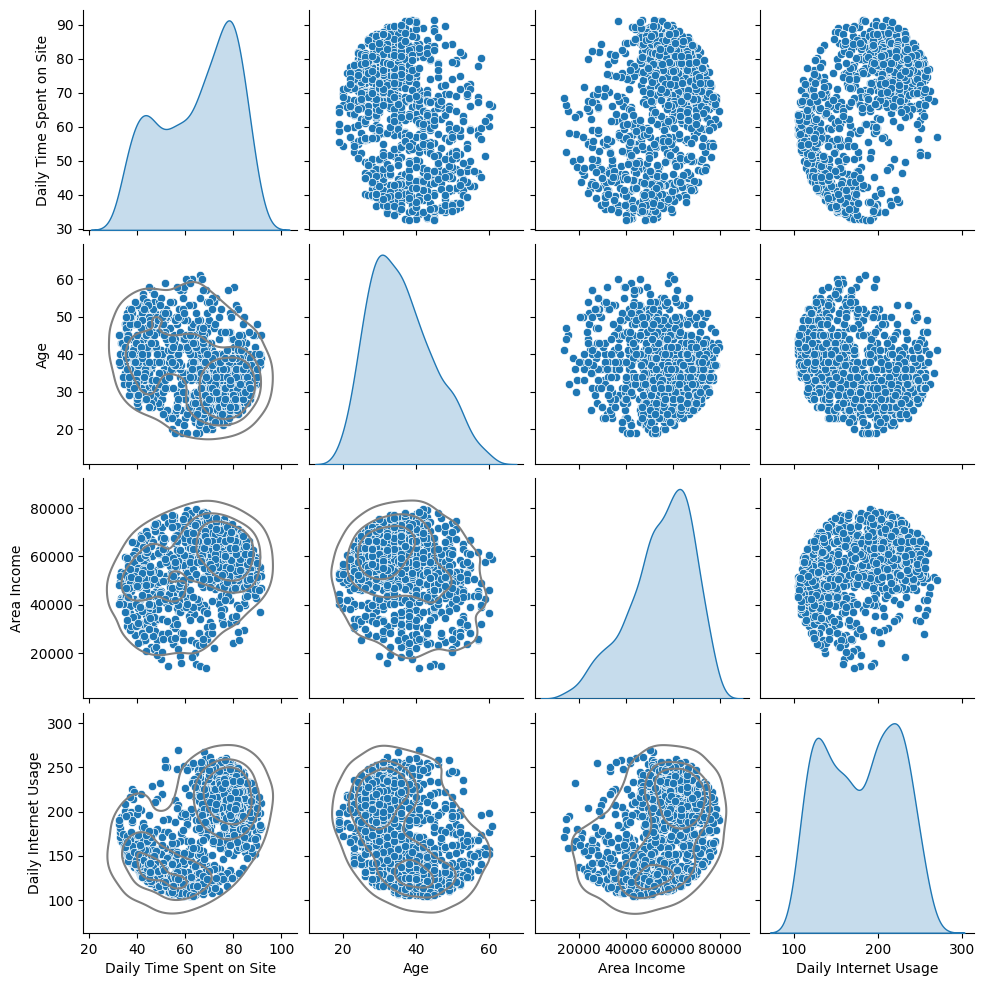

In [ ]:
import seaborn as sns

#plotting pairlot of numeric features
g = sns.pairplot(df[['Daily Time Spent on Site',
                     'Age',
                     'Area Income',
                     'Daily Internet Usage']], diag_kind="kde", palette='rocket')
g.map_lower(sns.kdeplot, levels=4, color=".5")

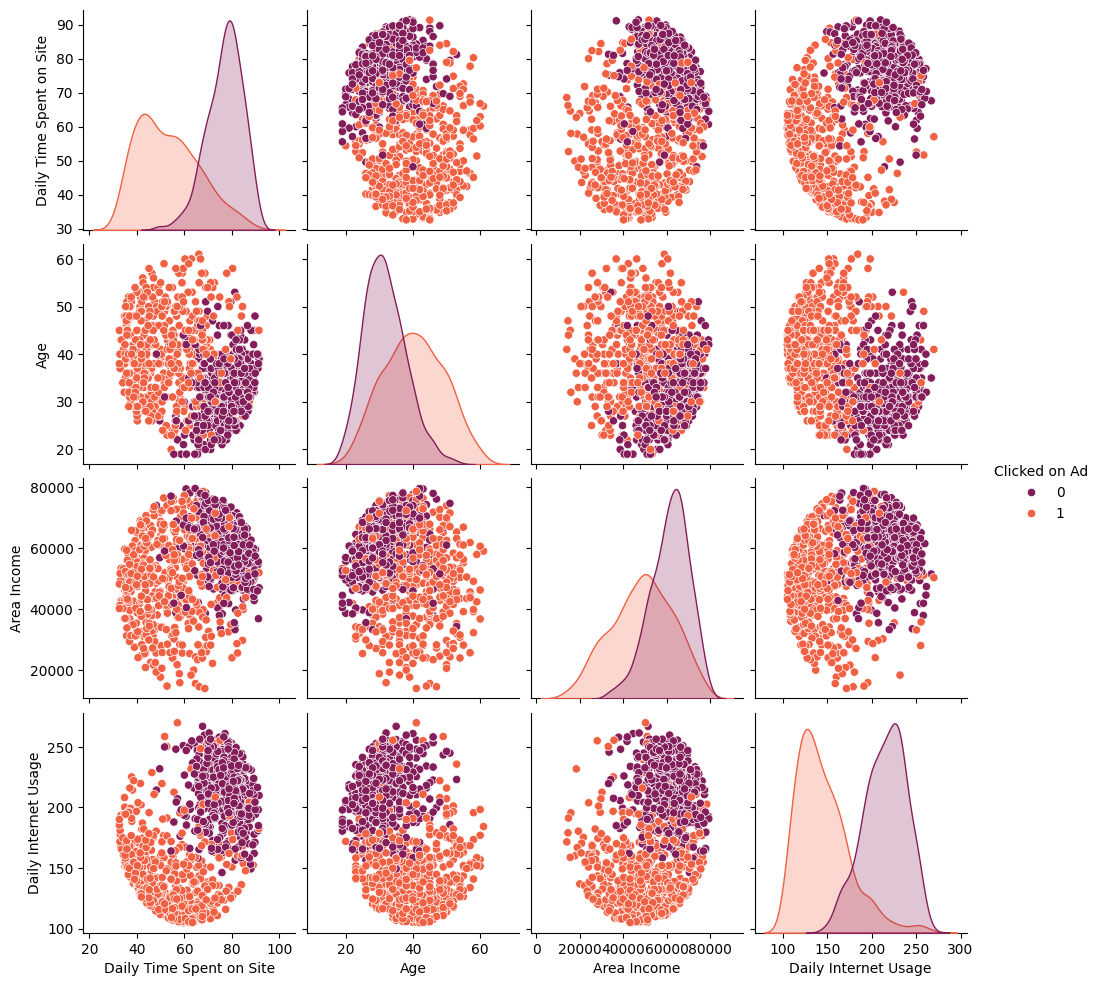

In [ ]:
sns.pairplot(df, hue='Clicked on Ad', vars=['Daily Time Spent on Site',
                                            'Age',
                                           'Area Income',
                                           'Daily Internet Usage'], palette='rocket')

In [ ]:
object_features = ['Ad Topic Line', 'City', 'Country', 'Timestamp']
df[object_features].describe(include=['O'])

,Ad Topic Line,City,Country,Timestamp
count,1009,998,996,1009
unique,1000,961,237,998
top,Proactive non-volatile encryption,Williamsport,Czech Republic,########
freq,2,3,9,5


In [ ]:
df.select_dtypes(exclude='object').shape


(1009, 5)

In [ ]:
from sklearn.impute import SimpleImputer

#filling null values with the median values
imputer = SimpleImputer()

df_numeric = df.select_dtypes(exclude='object')
imputed_df = imputer.fit_transform(df_numeric)

In [ ]:
from sklearn.preprocessing import StandardScaler

# since imputation converts the data frame into a numpy array,
# let's convert it into a dataframe back
df_train = pd.DataFrame(imputed_df)

# since imputation removes column names, let's put them back
df_train.columns = df.columns

##
train_features = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male', 'Month', 'Day', 'Weekday', 'Hour']

numeric_features = ['Daily Time Spent on Site', 'Age', 'Area Income',
                   'Daily Internet Usage']

scaler = StandardScaler()
df_train[numeric_features] = scaler.fit_transform(df_train[numeric_features])

X = df_train[train_features]
y = df_train['Clicked on Ad']

x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=101)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


ValueError: Length mismatch: Expected axis has 5 elements, new values have 10 elements

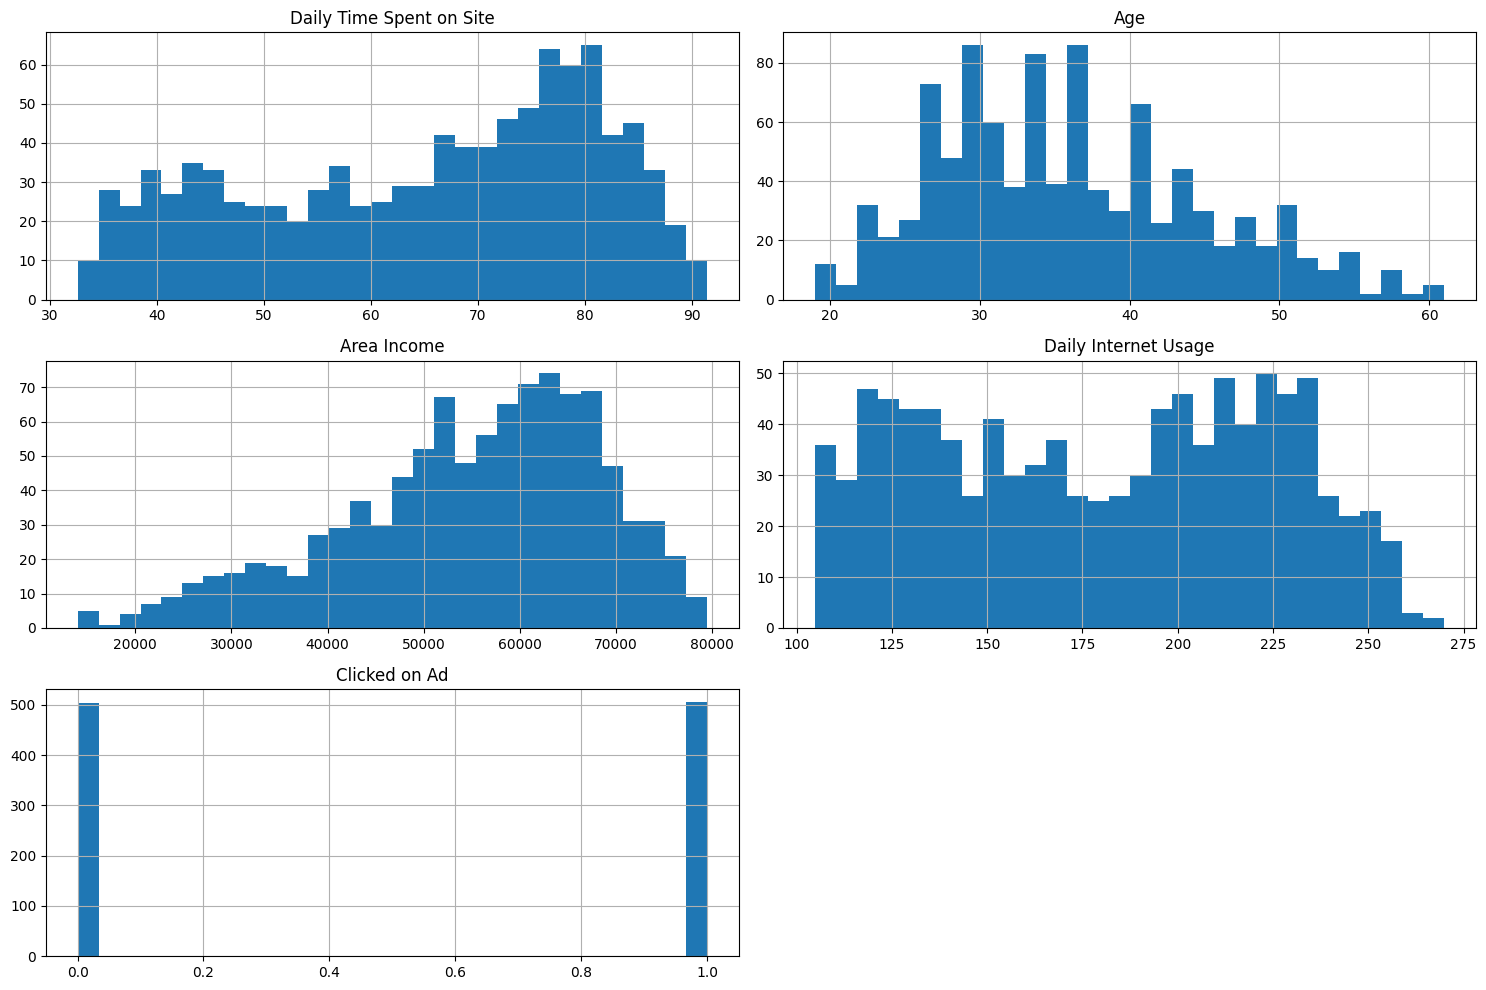

In [ ]:

# Plot histograms for all numerical columns
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

In [ ]:
# prompt: I need pre processing to be done on df dataframe

# Check for missing values
print(df.isnull().sum())

# Handle missing values (e.g., fill with mean or median)
# df['column_name'].fillna(df['column_name'].mean(), inplace=True)

# Convert categorical features to numerical using one-hot encoding
# df = pd.get_dummies(df, columns=['categorical_column'])

# Normalize or standardize numerical features
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# df[['numerical_column']] = scaler.fit_transform(df[['numerical_column']])

# Feature engineering (e.g., create new features from existing ones)
# df['new_feature'] = df['feature1'] * df['feature2']

# Remove irrelevant features
# df = df.drop(['irrelevant_column'], axis=1)



In [ ]:


adclickdata = drive.CreateFile({id:1DDdwQXSu7lWT9Kp6rpufxLBONAJ5Pv4A})
adclickdata.GetContentFile(‘advertising_ef.csv’)




SyntaxError: invalid decimal literal (<ipython-input-8-64db505aead1>, line 1)

In [ ]:
# prompt: need to plot histogram for df to understand the data distribution

# Assuming 'df' is your DataFrame
# Plot histograms for all numerical columns
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

SyntaxError: invalid syntax (<ipython-input-11-a131f2ae6a39>, line 1)

In [ ]:
data = pd.read_csv('https://drive.google.com/file/d/1Vv32WabniWZbfyJtLy1uZevoNYUYYMIB/view?usp=drive_link',parse_dates=True)
data.head()

HTTPError: HTTP Error 401: Unauthorized